### Have you ever wondered if you should pay 700€ for a smartphone? 
Does the price really come with the quality? 
Will it indeed serve you a longer time, and hence make the price worth it?

For example, If 30€ generic pair of jeans last 12 months, 
it's not worth it to pay 120€ for Levi's that last 18 months, 
as you could have 48 months worth of jeans vs 18 months, for the same price.

In my personal experience, I have noticed that expensive electronics break as often as cheap ones do. 
I also have noticed, that while it is worth to pay slightly more for a device (buy the second cheapest device), 
it often wasn't a good deal to pay premium.

So far this is just an opinion - what would the data say?

To this aim, I am going to scrape Amazon reviews for Samsung smartphones to find out 
if more expensive smartphones result in more customer happiness.

Of course this reasoning is simplistic, as there are many other factors influencing the review decision, such as:

-  Do people rate products relative to their price? Do they know they should expect less of a cheap smartphone and rate the product accordingly?
-  Conversely, could it be that expensive products have worse reviews, because you expect more of a 700€ smartphone?
-  When do people rate the product? Once it arrives, right after the joy of unboxing it, after a couple of days of use, or at a later time? If they rate it early, we miss the chance of penalty points if it breaks down (or is it meant to break down) within 6 or 12 months
-  Are we rating quality or durability? What if I enjoy wearing the Levi jeans so much that it's ok if they last only 12 months?

At any rate, not to get into the polemics too much, let's assume the simplistic model that more expensive smartphones should result in more customer happiness which should be expressed in the number of stars in the reviews.

In [259]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd
import random
import re
from selenium.common.exceptions import NoSuchElementException
import requests
from selenium.webdriver.support.ui import Select
import matplotlib.pyplot as plt
%matplotlib notebook
import random
from random import shuffle
import re
pd.options.mode.chained_assignment = None

In [154]:
driver = webdriver.Firefox()
driver.get('https://www.amazon.de/s?i=electronics&bbn=3468301&rh=n%3A562066%2Cn%3A569604%2Cn%3A1384526031%2Cn%3A3468301%2Cp_89%3AHUAWEI&dc&page=5&fst=as%3Aoff&qid=1576861861&rnid=669059031&ref=sr_pg_5')


In [155]:
soup = BeautifulSoup(driver.page_source, "lxml")
boxes = soup.findAll("a", attrs={'class' : 'a-link-normal a-text-normal'})

In [168]:
b1 = boxes[4]

In [171]:
b1.find_next_siblings()

[]

In [48]:
glossary = "https://www.amazon.de/s/other?rh=n%3A562066%2Cn%3A%21569604%2Cn%3A1384526031%2Cn%3A3468301&pickerToList=lbr_brands_browse-bin&qid=1576592710&ref=sr_sa_p_89"

apple = 'https://www.amazon.de/s?bbn=3468301&rh=n%3A562066%2Cn%3A%21569604%2Cn%3A1384526031%2Cn%3A3468301%2Cp_89%3AApple&dc&fst=as%3Aoff&qid=1576771433&rnid=669059031&ref=sr_in_-2_p_89_4'
google = 'https://www.amazon.de/s?bbn=3468301&rh=n%3A562066%2Cn%3A%21569604%2Cn%3A1384526031%2Cn%3A3468301%2Cp_89%3AGoogle&dc&fst=as%3Aoff&qid=1576771433&rnid=669059031&ref=sr_in_-2_p_89_16'
htc = 'https://www.amazon.de/s?bbn=3468301&rh=n%3A562066%2Cn%3A%21569604%2Cn%3A1384526031%2Cn%3A3468301%2Cp_89%3AHTC&dc&fst=as%3Aoff&qid=1576771433&rnid=669059031&ref=sr_in_-2_p_89_19'
huawei = 'https://www.amazon.de/s?bbn=3468301&rh=n%3A562066%2Cn%3A%21569604%2Cn%3A1384526031%2Cn%3A3468301%2Cp_89%3AHUAWEI&dc&fst=as%3Aoff&qid=1576771433&rnid=669059031&ref=sr_in_-2_p_89_20'
lg = 'https://www.amazon.de/s?bbn=3468301&rh=n%3A562066%2Cn%3A%21569604%2Cn%3A1384526031%2Cn%3A3468301%2Cp_89%3ALG+Electronics&dc&fst=as%3Aoff&qid=1576771433&rnid=669059031&ref=sr_in_-2_p_89_23'
moto = 'https://www.amazon.de/s?bbn=3468301&rh=n%3A562066%2Cn%3A%21569604%2Cn%3A1384526031%2Cn%3A3468301%2Cp_89%3AMotorola+Mobility&dc&fst=as%3Aoff&qid=1576771433&rnid=669059031&ref=sr_in_-2_p_89_24'
nokia = 'https://www.amazon.de/s?bbn=3468301&rh=n%3A562066%2Cn%3A%21569604%2Cn%3A1384526031%2Cn%3A3468301%2Cp_89%3ANokia&dc&fst=as%3Aoff&qid=1576771433&rnid=669059031&ref=sr_in_-2_p_89_25'
sony = 'https://www.amazon.de/s?bbn=3468301&rh=n%3A562066%2Cn%3A%21569604%2Cn%3A1384526031%2Cn%3A3468301%2Cp_89%3ASony&dc&fst=as%3Aoff&qid=1576771433&rnid=669059031&ref=sr_in_-2_p_89_36'
xiaomi = 'https://www.amazon.de/s?bbn=3468301&rh=n%3A562066%2Cn%3A%21569604%2Cn%3A1384526031%2Cn%3A3468301%2Cp_89%3AXiaomi&dc&fst=as%3Aoff&qid=1576771433&rnid=669059031&ref=sr_in_-2_p_89_48'
samsung = 'https://www.amazon.de/s?bbn=3468301&rh=n%3A562066%2Cn%3A%21569604%2Cn%3A1384526031%2Cn%3A3468301%2Cp_89%3ASamsung&dc&fst=as%3Aoff&qid=1576771433&rnid=669059031&ref=sr_in_-2_p_89_30'

# Product link harvesting (new)

In [193]:
driver = webdriver.Firefox()
all_data = []

for brand_url in [apple, google, htc, huawei, lg, moto, nokia, sony, xiaomi, samsung]:
    driver.get(brand_url)
    
    while True:
        time.sleep(random.randint(3, 9))
        if 'last_url' in locals():
            if driver.page_source == last_url:
                print('end of results, next button doesnt work')
                break
        
        soup = BeautifulSoup(driver.page_source, "lxml")
        boxes = soup.findAll('span', attrs={'class' : re.compile('SEARCH_RESULTS')})
        
        if not boxes:
            print("no boxes found")
            break
            
        for box in boxes:
            
            title = box.find("a", attrs={'class' : 'a-link-normal a-text-normal'}).getText()
            link = box.find("a", attrs={'class' : 'a-link-normal a-text-normal'}).attrs['href']

            reviews = box.find('a', attrs={'href' : re.compile('customerReviews')})

            # to scrape ethically, we will not crawl products with no reviews or too few in vain

            if reviews:
                review_count = reviews.getText().strip()
            else:
                review_count = 0

            part = [ (link, title, review_count, driver.current_url, i)]
            all_data.extend(part)
            
        pd.DataFrame(all_data).to_csv('amazon_links_2.csv')
        
        nextpage = driver.find_element_by_class_name('a-last')
        last_url = driver.page_source
        nextpage.click()

end of results, next button doesnt work
end of results, next button doesnt work
end of results, next button doesnt work
no boxes found
no boxes found
end of results, next button doesnt work
end of results, next button doesnt work
no boxes found
end of results, next button doesnt work
end of results, next button doesnt work


In [194]:
links = pd.DataFrame(all_data)
links.columns = ['link', 'title', 'reviews', 'source', 'i']

links = links[~links.link.str.lower().str.contains('tablet')]

links.link = 'https://www.amazon.de' + links.link

In [204]:
links.reviews = links.reviews.str.replace(',', '')#.apply(int)

In [212]:
links.reviews.fillna(0, inplace=True)

In [216]:
links = links[links.reviews.apply(int) > 15]

In [217]:
links.head()

,link,title,reviews,source,i
0,https://www.amazon.de/Apple-iPhone-11-128-GB-W...,\nApple iPhone 11 (128 GB) - Weiß\n,342,https://www.amazon.de/s?bbn=3468301&rh=n%3A562...,68
1,https://www.amazon.de/Apple-iPhone-Pro-256-GB-...,\nApple iPhone 11 Pro (256 GB) - Nachtgrün\n,139,https://www.amazon.de/s?bbn=3468301&rh=n%3A562...,68
2,https://www.amazon.de/Apple-iPhone-11-128-GB-P...,\nApple iPhone 11 (128 GB) - (PRODUCT)RED\n,342,https://www.amazon.de/s?bbn=3468301&rh=n%3A562...,68
3,https://www.amazon.de/Apple-iPhone-11-Pro-256-...,\nApple iPhone 11 Pro (256 GB) - Space Grau\n,139,https://www.amazon.de/s?bbn=3468301&rh=n%3A562...,68
4,https://www.amazon.de/Apple-iPhone-11-64-GB-Sc...,\nApple iPhone 11 (64 GB) - Schwarz\n,342,https://www.amazon.de/s?bbn=3468301&rh=n%3A562...,68


In [218]:
links.to_csv('amazon_links_2_slimmed.csv')

# Price and Review harvesting

In [224]:
driver = webdriver.Firefox()
prod_data = []
bad_urls = []

all_links = links.link.tolist()
shuffle(all_links)
all_links = list(set(all_links))

for url in all_links:
    try:
        driver.get(url)
        time.sleep(random.randint(3, 9))
        soup = BeautifulSoup(driver.page_source, 'lxml')

        avg = soup.find('div', attrs={'class' : 'a-fixed-left-grid AverageCustomerReviews a-spacing-small'})

        # no reviews
        if not avg:
            print(url)
            bad_urls.append(url)
            continue

        avg_rating = avg.find('span', attrs={'class' : 'a-size-medium a-color-base'}).getText()

        hist = soup.find('table', attrs={'id' : 'histogramTable'})
        hist_txt = str(hist.findNextSiblings()[0])
        distr = list(set(re.findall("([0-9]+)% der Rezensionen haben (\d) Sterne", hist_txt)))
        #review_count = re.findall( '([0-9]+) Sternebewertungen', driver.page_source)
        review_count = soup.find('div', attrs={'data-hook' : 'total-review-count'}).getText().strip()


        pricebox = soup.find('div', attrs={'id' : 'price'})
        try:
            price = pricebox.find('span', attrs={'class': 'a-size-medium a-color-price priceBlockBuyingPriceString'}).getText()
            price_type = 'official'
        except:
            try:
                price = soup.find(text=re.compile("Neu \([0-9]+\) ab")).findNext().getText()
                price_type = '3rd party'
            except:
                print(url)
                bad_urls.append(url)
                continue

        title = soup.find('span', attrs={'id' : 'productTitle'}).getText().strip()

        one = [distr, review_count, avg_rating, price, price_type, title, url]
        prod_data.append(one)

        pd.DataFrame(prod_data).to_excel('product_data.xlsx')
    except Exception as e:
        print(e, url)

https://www.amazon.de/HTC-Smartphone-Android-Kamera-schwarz-braun-schwarz/dp/B002LKCPMI/ref=sr_1_52?fst=as%3Aoff&qid=1576866809&refinements=p_89%3AHTC&rnid=669059031&s=ce-de&sr=1-52
https://www.amazon.de/Dual-SIM-Smartphone-Android-USB-Adapter-Exklusiv-Aurora/dp/B07PMKVDFH/ref=sr_1_50?fst=as%3Aoff&qid=1576866992&refinements=p_89%3AHUAWEI&rnid=669059031&s=ce-de&sr=1-50
https://www.amazon.de/Samsung-SGH-C270WSADBT-SGH-C270-white-silver-Handy/dp/B001QZO7SE/ref=sr_1_604?fst=as%3Aoff&qid=1576868788&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-604
https://www.amazon.de/iPhone-Plus-32GB-Space-Grey/dp/B01LTGYVP8/ref=sr_1_216?fst=as%3Aoff&qid=1576866631&refinements=p_89%3AApple&rnid=669059031&s=ce-de&sr=1-216
https://www.amazon.de/Google-Android-SIM-Free-Unlocked-Smartphone-Clearly-White/dp/B07YMFYTYY/ref=sr_1_46?fst=as%3Aoff&qid=1576866738&refinements=p_89%3AGoogle&rnid=669059031&s=ce-de&sr=1-46
https://www.amazon.de/Sony-Smartphone-Display-Speicher-Android-Silber/dp/B078KHJ9HW/ref=s

https://www.amazon.de/Samsung-Smartphone-Touch-Display-interner-Midgnight-Midnight-Black/dp/B079Z7LQ5P/ref=sr_1_1041?fst=as%3Aoff&qid=1576869077&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-1041
https://www.amazon.de/HTC-Smartphone-Frontkamera-Speicher-Brilliant-Schwarz/dp/B0725GZ3SW/ref=sr_1_6?fst=as%3Aoff&qid=1576866784&refinements=p_89%3AHTC&rnid=669059031&s=ce-de&sr=1-6
https://www.amazon.de/Huawei-Smartphone-Touchscreen-Megapixel-Interner-wei%C3%9F/dp/B00BNZNHIS/ref=sr_1_454?fst=as%3Aoff&qid=1576867181&refinements=p_89%3AHUAWEI&rnid=669059031&s=ce-de&sr=1-454
https://www.amazon.de/Samsung-Galaxy-G9287-Silver-Titaniu/dp/B014EHCWC8/ref=sr_1_1430?fst=as%3Aoff&qid=1576869256&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-1430
https://www.amazon.de/Dual-Sim-Smartphone-interner-Speicher-Android-Aurora-Blau/dp/B076CJK4WB/ref=sr_1_264?fst=as%3Aoff&qid=1576867077&refinements=p_89%3AHUAWEI&rnid=669059031&s=ce-de&sr=1-264
https://www.amazon.de/Motorola-Moto-Smartphone-Andro

https://www.amazon.de/Apple-iPhone-XS-Max-64-GB/dp/B07HBF9DZ2/ref=sr_1_81?fst=as%3Aoff&qid=1576866581&refinements=p_89%3AApple&rnid=669059031&s=ce-de&sr=1-81
https://www.amazon.de/HTC-Touch-Smartphone-silver-Purple-gloss/dp/B002OL2NEO/ref=sr_1_167?fst=as%3Aoff&qid=1576866858&refinements=p_89%3AHTC&rnid=669059031&s=ce-de&sr=1-167
https://www.amazon.de/Samsung-Smartphone-AMOLED-Touchscreen-Micro-Sim-Megapixel-Fleur/dp/B00HRLQKWW/ref=sr_1_679?fst=as%3Aoff&qid=1576868818&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-679
https://www.amazon.de/Google-Pixel-32GB-Android-Anthrazit-Schwarz/dp/B01M4M80N3/ref=sr_1_31?fst=as%3Aoff&qid=1576866738&refinements=p_89%3AGoogle&rnid=669059031&s=ce-de&sr=1-31
https://www.amazon.de/Motorola-Moto-Smartphone-Zoll-Android-wei%C3%9F/dp/B01FLZCBA0/ref=sr_1_46?fst=as%3Aoff&qid=1576867360&refinements=p_89%3AMotorola+Mobility&rnid=669059031&s=ce-de&sr=1-46
https://www.amazon.de/Samsung-Smartphone-Touchscreen-Dual-Core-Megapixel-Titan-Grau/dp/B00BMUMJ5Q/re

https://www.amazon.de/Xiaomi-Mi-Mix-Dual-SIM/dp/B07F1JXVLY/ref=sr_1_274?fst=as%3Aoff&qid=1576868438&refinements=p_89%3AXiaomi&rnid=669059031&s=ce-de&sr=1-274
https://www.amazon.de/Motorola-Generation-Dual-Sim-Smartphone-Touch-Display-wei%C3%9F/dp/B00ORV2G32/ref=sr_1_77?fst=as%3Aoff&qid=1576867392&refinements=p_89%3AMotorola+Mobility&rnid=669059031&s=ce-de&sr=1-77
https://www.amazon.de/Huawei-Smartphone-Touchscreen-Megapixel-Interner-schwarz/dp/B00EUZN1RA/ref=sr_1_434?fst=as%3Aoff&qid=1576867181&refinements=p_89%3AHUAWEI&rnid=669059031&s=ce-de&sr=1-434
https://www.amazon.de/Nokia-6233-classic-black-Handy-Schwarz/dp/B000G0720K/ref=sr_1_265?fst=as%3Aoff&qid=1576867690&refinements=p_89%3ANokia&rnid=669059031&s=ce-de&sr=1-265
https://www.amazon.de/Samsung-Galaxy-Smartphone-Bundle-Speicherkarte-Black/dp/B07GQW6LPD/ref=sr_1_621?fst=as%3Aoff&qid=1576868788&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-621
https://www.amazon.de/Samsung-Galaxy-A70-Smartphone-Italienische-Orange/dp/B07QP

https://www.amazon.de/HTC-Mozart-Smartphone-Touchscreen-Megapixel-mit-T-Mobile-Branding/dp/B0046Z7R6U/ref=sr_1_184?fst=as%3Aoff&qid=1576866870&refinements=p_89%3AHTC&rnid=669059031&s=ce-de&sr=1-184
https://www.amazon.de/HUAWEI-Smartphone-Hauptkamera-Frontkamera-Sapphire-Blue/dp/B07R4WVMH1/ref=sr_1_66?fst=as%3Aoff&qid=1576866992&refinements=p_89%3AHUAWEI&rnid=669059031&s=ce-de&sr=1-66
https://www.amazon.de/Samsung-Galaxy-A70-Smartphone-Italienische-Schwarz/dp/B07QNKVY5B/ref=sr_1_597?fst=as%3Aoff&qid=1576868779&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-597
https://www.amazon.de/Samsung-GT-I8750ALADBT-Smartphone-Megapixel-Aluminium-silber/dp/B00B090QRM/ref=sr_1_834?fst=as%3Aoff&qid=1576868896&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-834
https://www.amazon.de/Samsung-SGH-F480i-Smartphone-Touchscreen-Kamera-coral-pink/dp/B002LYZDFA/ref=sr_1_682?fst=as%3Aoff&qid=1576868818&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-682
https://www.amazon.de/Xiaomi-Redmi

https://www.amazon.de/Samsung-Galaxy-Pocket-S5300-Touchscreen-black/dp/B007NLA4V4/ref=sr_1_821?fst=as%3Aoff&qid=1576868896&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-821
https://www.amazon.de/Samsung-Smartphone-Touch-Display-Speicher-Android-Wei%C3%9F/dp/B00R8GLAUS/ref=sr_1_352?fst=as%3Aoff&qid=1576868662&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-352
https://www.amazon.de/Samsung-E1080-Handy-black/dp/B003HC8GEA/ref=sr_1_622?fst=as%3Aoff&qid=1576868788&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-622
https://www.amazon.de/HTC-Desire-Smartphone-Android-Sense-ohne-Branding/dp/B0038JDF3E/ref=sr_1_134?fst=as%3Aoff&qid=1576866848&refinements=p_89%3AHTC&rnid=669059031&s=ce-de&sr=1-134
https://www.amazon.de/Sony-Smartphone-Display-Speicher-Android-Silber/dp/B078KJLY9T/ref=sr_1_13?fst=as%3Aoff&qid=1576867947&refinements=p_89%3ASony&rnid=669059031&s=ce-de&sr=1-13
https://www.amazon.de/HTC-10-Smartphone-Videoaufnahme-gusseisern-Cast-Iron/dp/B01N44NLP3/ref=sr_1_3

https://www.amazon.de/Samsung-GT-I8200-Smartphone-Touch-Display-Speicher-Blau/dp/B00JEITKZU/ref=sr_1_303?fst=as%3Aoff&qid=1576868636&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-303
https://www.amazon.de/Nokia-black-HSDPA-Kamera-Smartphone-mit-8-GB/dp/B000VXLXVG/ref=sr_1_277?fst=as%3Aoff&qid=1576867690&refinements=p_89%3ANokia&rnid=669059031&s=ce-de&sr=1-277
https://www.amazon.de/P8-Lite-Hisilicon-Smartphone-Compatible-goldfarben/dp/B014VR5CSW/ref=sr_1_435?fst=as%3Aoff&qid=1576867181&refinements=p_89%3AHUAWEI&rnid=669059031&s=ce-de&sr=1-435
https://www.amazon.de/Samsung-Smartphone-Touch-Display-Speicher-Android-Black/dp/B00R8GL6PC/ref=sr_1_715?fst=as%3Aoff&qid=1576868834&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-715
https://www.amazon.de/Microsoft-30426-Nokia-black-Handy/dp/B000FCOMVG/ref=sr_1_108?fst=as%3Aoff&qid=1576867615&refinements=p_89%3ANokia&rnid=669059031&s=ce-de&sr=1-108
https://www.amazon.de/Huawei-P10-Plus-Smartphone-Touch-Display-gold/dp/B06XBXCJK7/r

https://www.amazon.de/Huawei-E5832-Wireless-Modem-Netzwerkzugriff/dp/B004ROBP8Q/ref=sr_1_410?fst=as%3Aoff&qid=1576867168&refinements=p_89%3AHUAWEI&rnid=669059031&s=ce-de&sr=1-410
https://www.amazon.de/Samsung-Smartphone-Super-Amoled-Frontkamera-EU-Version-schwarz/dp/B004XBQ9HK/ref=sr_1_874?fst=as%3Aoff&qid=1576868915&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-874
https://www.amazon.de/Nokia-velvet-VGA-Digitalkamera-Displays-UKW-Radio-red/dp/B000UGBUTY/ref=sr_1_112?fst=as%3Aoff&qid=1576867615&refinements=p_89%3ANokia&rnid=669059031&s=ce-de&sr=1-112
https://www.amazon.de/Samsung-Smartphone-Touchscreen-Betriebssystem-pure-white/dp/B007I0BAEU/ref=sr_1_520?fst=as%3Aoff&qid=1576868740&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-520
https://www.amazon.de/Sony-Smartphone-interner-Speicher-Dual-SIM-Coral-Pink/dp/B079YRCCK6/ref=sr_1_23?fst=as%3Aoff&qid=1576867947&refinements=p_89%3ASony&rnid=669059031&s=ce-de&sr=1-23
https://www.amazon.de/Samsung-Smartphone-Touchscreen-Meg

https://www.amazon.de/Samsung-Smartphone-Display-Dual-Core-Megapixel-Braun/dp/B00B5XR4QY/ref=sr_1_653?fst=as%3Aoff&qid=1576868809&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-653
https://www.amazon.de/Nokia-Smartphone-interner-Speicher-Schl%C3%BCsselbundlampe-Grau/dp/B07HJH4HZY/ref=sr_1_243?fst=as%3Aoff&qid=1576867682&refinements=p_89%3ANokia&rnid=669059031&s=ce-de&sr=1-243
https://www.amazon.de/Dual-Sim-Smartphone-Speicher-Speicherkarte-Exklusiv-Schwarz/dp/B07FN1RVHB/ref=sr_1_142?fst=as%3Aoff&qid=1576867031&refinements=p_89%3AHUAWEI&rnid=669059031&s=ce-de&sr=1-142
https://www.amazon.de/Dual-SIM-Smartphone-Breathing-USB-Adapter-Exklusiv-Crystal/dp/B07PRYCG7Z/ref=sr_1_45?fst=as%3Aoff&qid=1576866981&refinements=p_89%3AHUAWEI&rnid=669059031&s=ce-de&sr=1-45
https://www.amazon.de/Samsung-SM-J600F-Galaxy-Smartphone-Kamera-Gold/dp/B07FJHMRG5/ref=sr_1_292?fst=as%3Aoff&qid=1576868636&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-292
https://www.amazon.de/Motorola-Smartphone-H

https://www.amazon.de/HTC-Smartphone-Quad-Core-Prozessor-Megapixel-Rot/dp/B00OHIQ4NS/ref=sr_1_177?fst=as%3Aoff&qid=1576866870&refinements=p_89%3AHTC&rnid=669059031&s=ce-de&sr=1-177
https://www.amazon.de/Apple-Smartphone-Touch-Display-Speicher-spacegrau/dp/B00F8JDD2K/ref=sr_1_285?fst=as%3Aoff&qid=1576866656&refinements=p_89%3AApple&rnid=669059031&s=ce-de&sr=1-285
https://www.amazon.de/Motorola-Moto-Plus-Smartphone-Android-wei%C3%9F/dp/B01FLZCB28/ref=sr_1_49?fst=as%3Aoff&qid=1576867379&refinements=p_89%3AMotorola+Mobility&rnid=669059031&s=ce-de&sr=1-49
https://www.amazon.de/Samsung-Smartphone-Touch-Display-Quad-Core-Prozessor-Blau/dp/B00J5QA3W0/ref=sr_1_1004?fst=as%3Aoff&qid=1576869047&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-1004
https://www.amazon.de/Samsung-Smartphone-Touch-Display-Speicher-Android-gold/dp/B013OT0AU8/ref=sr_1_346?fst=as%3Aoff&qid=1576868662&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-346
https://www.amazon.de/Samsung-Smartphone-AMOLED-Display-

https://www.amazon.de/Samsung-Smartphone-Display-Speicher-Android-Rose-Pink/dp/B076X8K1ND/ref=sr_1_63?fst=as%3Aoff&qid=1576868509&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-63
https://www.amazon.de/Samsung-Smartphone-Touch-Display-Speicher-Android-blau/dp/B01N9MKD8C/ref=sr_1_228?fst=as%3Aoff&qid=1576868591&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-228
https://www.amazon.de/Microsoft-6230-GP-Nokia-graphit-grau/dp/B0001ZE4Z6/ref=sr_1_313?fst=as%3Aoff&qid=1576867706&refinements=p_89%3ANokia&rnid=669059031&s=ce-de&sr=1-313
https://www.amazon.de/Nokia-Bluetooth-Kamera-Musik-Player-aluminium-raw/dp/B003EJ2MYQ/ref=sr_1_307?fst=as%3Aoff&qid=1576867696&refinements=p_89%3ANokia&rnid=669059031&s=ce-de&sr=1-307
https://www.amazon.de/Samsung-M-G935FZBAITV-Galaxy-Smartphone-Kamera-blau/dp/B01N6PH72X/ref=sr_1_271?fst=as%3Aoff&qid=1576868621&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-271
https://www.amazon.de/Samsung-Smartphone-Touch-Display-Speicher-Android-Schwar

https://www.amazon.de/Nokia-2760-VGA-Digitalkamera-Displays-UKW-Radio-gold/dp/B000VFU0X6/ref=sr_1_160?fst=as%3Aoff&qid=1576867634&refinements=p_89%3ANokia&rnid=669059031&s=ce-de&sr=1-160
https://www.amazon.de/Sony-Smartphone-interner-Speicher-Dual-SIM-Deep-Green/dp/B079YS5Q9K/ref=sr_1_148?fst=as%3Aoff&qid=1576868032&refinements=p_89%3ASony&rnid=669059031&s=ce-de&sr=1-148
https://www.amazon.de/Sony-Xperia-Smartphone-Zoll-Split-Screen-Schwarz/dp/B07NDSJLSP/ref=sr_1_9?fst=as%3Aoff&qid=1576867947&refinements=p_89%3ASony&rnid=669059031&s=ce-de&sr=1-9
https://www.amazon.de/SAMSUNG-Galaxy-Smartphone-midnight-black-Schwarz/dp/B07536MYBQ/ref=sr_1_1392?fst=as%3Aoff&qid=1576869237&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-1392
https://www.amazon.de/Apple-iPhone-7-32GB-Ros%C3%A9gold/dp/B01LSUZ8KW/ref=sr_1_223?fst=as%3Aoff&qid=1576866636&refinements=p_89%3AApple&rnid=669059031&s=ce-de&sr=1-223
https://www.amazon.de/Motorola-Motoluxe-Smartphone-FWVGA-Touchscreen-Megapixel-wei%C3%9F/dp/B

https://www.amazon.de/Samsung-Smartphone-Display-Speicher-Android-Schwarz/dp/B07215Q3Y1/ref=sr_1_88?fst=as%3Aoff&qid=1576868525&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-88
https://www.amazon.de/Samsung-MOB-Mob-B2710-Makalu/dp/B0042ORU08/ref=sr_1_1526?fst=as%3Aoff&qid=1576869304&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-1526
https://www.amazon.de/Samsung-Smartphone-Touch-Display-Speicher-Android-Wei%C3%9F/dp/B00D8T9QZK/ref=sr_1_244?fst=as%3Aoff&qid=1576868608&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-244
https://www.amazon.de/Sony-Smartphone-interner-Speicher-Dual-SIM-Ash-Pink/dp/B079Z1G1DW/ref=sr_1_91?fst=as%3Aoff&qid=1576867979&refinements=p_89%3ASony&rnid=669059031&s=ce-de&sr=1-91
https://www.amazon.de/Google-Pixel-Smartphone-Android-Clearly-White/dp/B07RLVMT5N/ref=sr_1_3?fst=as%3Aoff&qid=1576866725&refinements=p_89%3AGoogle&rnid=669059031&s=ce-de&sr=1-3
https://www.amazon.de/Samsung-Galaxy-Smartphone-Interner-Speicher-Black/dp/B07DPTVMYM/ref=s

https://www.amazon.de/Huawei-P20-128-Single-Smartphone-Black/dp/B07CKQMZ3V/ref=sr_1_377?fst=as%3Aoff&qid=1576867132&refinements=p_89%3AHUAWEI&rnid=669059031&s=ce-de&sr=1-377
https://www.amazon.de/Sony-Xperia-Premium-Touch-Display-chrom/dp/B014R5QZTS/ref=sr_1_94?fst=as%3Aoff&qid=1576867979&refinements=p_89%3ASony&rnid=669059031&s=ce-de&sr=1-94
https://www.amazon.de/Samsung-Smartphone-Touchscreen-MP3-Player-snow-white-snow-white/dp/B002EOZGM2/ref=sr_1_470?fst=as%3Aoff&qid=1576868724&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-470
https://www.amazon.de/Samsung-i9100-Galaxy-S2-Smartphone-Android-16-GB-schwarz/dp/B0052EWH32/ref=sr_1_608?fst=as%3Aoff&qid=1576868788&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-608
https://www.amazon.de/Samsung-Galaxy-Dual-64GB-A305F-DS-Blau/dp/B07Q7FS73Z/ref=sr_1_341?fst=as%3Aoff&qid=1576868662&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-341
https://www.amazon.de/Huawei-Nexus-6P-Smartphone-entsperrt-stahlfarben/dp/B016NS78NY/re

https://www.amazon.de/Motorola-Smartphone-Touchscreen-wassergesch%C3%BCtzt-staubdicht-schwarz/dp/B00429ZAUK/ref=sr_1_90?fst=as%3Aoff&qid=1576867392&refinements=p_89%3AMotorola+Mobility&rnid=669059031&s=ce-de&sr=1-90
https://www.amazon.de/Samsung-C3330-Touchscreen-Megapixel-metallic-silber-silber/dp/B005TIESB0/ref=sr_1_1170?fst=as%3Aoff&qid=1576869143&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-1170
https://www.amazon.de/Sony-Ericsson-W200i-Rythm-Black-schwarz/dp/B000MJMZYI/ref=sr_1_225?fst=as%3Aoff&qid=1576868159&refinements=p_89%3ASony&rnid=669059031&s=ce-de&sr=1-225
https://www.amazon.de/Huawei-P9-Smartphone-Westeurop%C3%A4ische-Version-Schwarz/dp/B01ELJFWLW/ref=sr_1_320?fst=as%3Aoff&qid=1576867107&refinements=p_89%3AHUAWEI&rnid=669059031&s=ce-de&sr=1-320
https://www.amazon.de/Sony-Smartphone-Display-Speicher-Android-Blau/dp/B078KJ4LNL/ref=sr_1_221?fst=as%3Aoff&qid=1576868159&refinements=p_89%3ASony&rnid=669059031&s=ce-de&sr=1-221
https://www.amazon.de/Sony-Ericsson-W580i-

https://www.amazon.de/Sony-Smartphone-Display-Speicher-Android-Schwarz/dp/B078KHZ5HG/ref=sr_1_17?fst=as%3Aoff&qid=1576867947&refinements=p_89%3ASony&rnid=669059031&s=ce-de&sr=1-17
https://www.amazon.de/Smartphone-interner-Speicher-Herstellergarantie-Exklusiv-Ceramic-White/dp/B07SFGW5TY/ref=sr_1_46?fst=as%3Aoff&qid=1576868494&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-46
https://www.amazon.de/Huawei-P10-Plus-Smartphone-Touch-Display-Blue/dp/B06XC4SSVC/ref=sr_1_359?fst=as%3Aoff&qid=1576867117&refinements=p_89%3AHUAWEI&rnid=669059031&s=ce-de&sr=1-359
https://www.amazon.de/Samsung-S7220-MP-Kamera-MP3-Player-platinum-red/dp/B001TIKQR4/ref=sr_1_767?fst=as%3Aoff&qid=1576868857&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-767
https://www.amazon.de/Nokia-13-Zoll-Smartphone-spritzgesch%C3%BCtzt-glossy-blue-128GB-6GB-RAM/dp/B0761G2DF5/ref=sr_1_276?fst=as%3Aoff&qid=1576867690&refinements=p_89%3ANokia&rnid=669059031&s=ce-de&sr=1-276
https://www.amazon.de/Xiaomi-64GB-Dual-Versi

https://www.amazon.de/Apple-iPhone-X-256GB-Space-Grau/dp/B075LWF4C3/ref=sr_1_80?fst=as%3Aoff&qid=1576866581&refinements=p_89%3AApple&rnid=669059031&s=ce-de&smid=A3JWKAKR8XB7XF&sr=1-80
https://www.amazon.de/Samsung-S4-Mini-Smartphone-Android-Bildschirm-Schwarz/dp/B00E5WISFS/ref=sr_1_483?fst=as%3Aoff&qid=1576868734&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-483
https://www.amazon.de/Motorola-Moto-Plus-Smartphone-Android-Fine-Gold/dp/B071J7FRBD/ref=sr_1_93?fst=as%3Aoff&qid=1576867392&refinements=p_89%3AMotorola+Mobility&rnid=669059031&s=ce-de&sr=1-93
https://www.amazon.de/Huawei-Dual-SIM-Smartphone-midnight-Typ-C-Adapter-Midnight-Blau/dp/B07J5KFBRG/ref=sr_1_153?fst=as%3Aoff&qid=1576867040&refinements=p_89%3AHUAWEI&rnid=669059031&s=ce-de&sr=1-153
https://www.amazon.de/Sony-Smartphone-Display-Speicher-Android-Gold/dp/B078KJ6L6T/ref=sr_1_130?fst=as%3Aoff&qid=1576867999&refinements=p_89%3ASony&rnid=669059031&s=ce-de&sr=1-130
https://www.amazon.de/HTC-One-M9-Smartphone-Touch-Displa

https://www.amazon.de/Huawei-Smartphone-Touchscreen-Megapixel-Interner-schwarz/dp/B0089YTGEA/ref=sr_1_111?fst=as%3Aoff&qid=1576867019&refinements=p_89%3AHUAWEI&rnid=669059031&s=ce-de&sr=1-111
https://www.amazon.de/Samsung-C3050-VGA-Kamera-MP3-Player-snow-white/dp/B002KCTR8C/ref=sr_1_826?fst=as%3Aoff&qid=1576868896&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-826
https://www.amazon.de/Samsung-SGH-U700-Handy-silber-Simlock/dp/B000QIXKPS/ref=sr_1_794?fst=as%3Aoff&qid=1576868876&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-794
https://www.amazon.de/Apple-iPhone-7-Plus-32GB-Silber/dp/B01LTGXMJY/ref=sr_1_221?fst=as%3Aoff&qid=1576866636&refinements=p_89%3AApple&rnid=669059031&s=ce-de&sr=1-221
https://www.amazon.de/Huawei-Smartphone-Megapixel-Interner-Speicher-wei%C3%9F/dp/B005K7IVFE/ref=sr_1_481?fst=as%3Aoff&qid=1576867213&refinements=p_89%3AHUAWEI&rnid=669059031&s=ce-de&sr=1-481
https://www.amazon.de/Samsung-Smartphone-Touchscreen-Megapixel-chic-white/dp/B00714IQCW/ref=sr

https://www.amazon.de/Huawei-Smartphone-Touchscreen-Megapixel-Kamera-Autofokus-Schwarz/dp/B00IMCTW6Q/ref=sr_1_407?fst=as%3Aoff&qid=1576867151&refinements=p_89%3AHUAWEI&rnid=669059031&s=ce-de&sr=1-407
https://www.amazon.de/Samsung-Smartphone-Touch-Display-interner-Speicher-Lilac-Purple/dp/B079X8695B/ref=sr_1_547?fst=as%3Aoff&qid=1576868752&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-547
https://www.amazon.de/Samsung-Smartphone-Touch-Display-Speicher-Android-wei%C3%9F/dp/B012CC7RSG/ref=sr_1_344?fst=as%3Aoff&qid=1576868662&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-344
https://www.amazon.de/Samsung-Smartphone-Super-AMOLED-Display-Quad-Core-Megapixel-Kamera-Wei%C3%9F/dp/B00R5W51SW/ref=sr_1_651?fst=as%3Aoff&qid=1576868809&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-651
https://www.amazon.de/Huawei-Smartphone-Megapixel-Interner-Speicher-schwarz/dp/B005K7IVH2/ref=sr_1_421?fst=as%3Aoff&qid=1576867168&refinements=p_89%3AHUAWEI&rnid=669059031&s=ce-de&sr=1-421
ht

https://www.amazon.de/Samsung-Smartphone-interner-Speicher-SD-Karte-Blau/dp/B07SXMZD4L/ref=sr_1_177?fst=as%3Aoff&qid=1576868571&refinements=p_89%3ASamsung&rnid=669059031&s=ce-de&sr=1-177
https://www.amazon.de/HTC-Smartphone-Touchscreen-Quad-Core-Prozessor-Ultrapixel-Silber/dp/B00FGQFPXA/ref=sr_1_84?fst=as%3Aoff&qid=1576866821&refinements=p_89%3AHTC&rnid=669059031&s=ce-de&sr=1-84
https://www.amazon.de/Microsoft-68791-Nokia-5110-Handy-Schwarz/dp/B00005M26B/ref=sr_1_132?fst=as%3Aoff&qid=1576867624&refinements=p_89%3ANokia&rnid=669059031&s=ce-de&sr=1-132


In [458]:
df = pd.DataFrame(prod_data, columns=['star_hist', 'rev_count', 'avg_rev', 'price', 'price_cat', 'title', 'link', ])

In [228]:
df.to_pickle('amazon_data.pkl')

# Data cleaning

In [231]:
df.head()

,star_hist,rev_count,avg_rev,price,price_cat,title,link
0,"[(6, 3), (21, 1), (14, 4), (7, 2), (53, 5)]",742 Sternebewertungen,"3,7 von 5","269,99 €",official,Apple iPhone 7 128GB Roségold (Generalüberholt),https://www.amazon.de/Apple-iPhone-SIM-Free-Ro...
1,"[(23, 3), (18, 2), (19, 4), (22, 5), (18, 1)]",27 Sternebewertungen,"3,1 von 5","199,90 €",official,HTC Rhyme Smartphone (9.4 cm (3.7 Zoll) Touchs...,https://www.amazon.de/HTC-Smartphone-Touchscre...
2,"[(7, 3), (4, 2), (59, 5), (12, 4), (18, 1)]",36 Sternebewertungen,"3,9 von 5","330,19 €",official,"Samsung Galaxy S8+ Smartphone (6,2 Zoll (15,8 ...",https://www.amazon.de/Samsung-Smartphone-Touch...
3,"[(13, 1), (8, 3), (4, 2), (15, 4), (59, 5)]",86 Sternebewertungen,4 von 5,"349,90 €",official,"Samsung Galaxy S III Neo Smartphone (4,8 Zoll ...",https://www.amazon.de/Samsung-Smartphone-Touch...
4,"[(13, 4), (16, 1), (64, 5), (3, 2), (3, 3)]",54 Sternebewertungen,"4,1 von 5","527,12 €",official,Apple iPhone 8 Plus 256GB Space Grau (Generalü...,https://www.amazon.de/Apple-iPhone-Display-SIM...


In [459]:
df.rev_count = df.rev_count.str.split().str[0].str.replace('.', '').apply(int)

In [460]:
df = df[df.price != '']

In [461]:
df.price = df.price.str.replace('\s€|\.', '').str.replace(',', '.').apply(float).round(0)

In [462]:
df.head()

,star_hist,rev_count,avg_rev,price,price_cat,title,link
0,"[(6, 3), (21, 1), (14, 4), (7, 2), (53, 5)]",742,"3,7 von 5",270.0,official,Apple iPhone 7 128GB Roségold (Generalüberholt),https://www.amazon.de/Apple-iPhone-SIM-Free-Ro...
1,"[(23, 3), (18, 2), (19, 4), (22, 5), (18, 1)]",27,"3,1 von 5",200.0,official,HTC Rhyme Smartphone (9.4 cm (3.7 Zoll) Touchs...,https://www.amazon.de/HTC-Smartphone-Touchscre...
2,"[(7, 3), (4, 2), (59, 5), (12, 4), (18, 1)]",36,"3,9 von 5",330.0,official,"Samsung Galaxy S8+ Smartphone (6,2 Zoll (15,8 ...",https://www.amazon.de/Samsung-Smartphone-Touch...
3,"[(13, 1), (8, 3), (4, 2), (15, 4), (59, 5)]",86,4 von 5,350.0,official,"Samsung Galaxy S III Neo Smartphone (4,8 Zoll ...",https://www.amazon.de/Samsung-Smartphone-Touch...
4,"[(13, 4), (16, 1), (64, 5), (3, 2), (3, 3)]",54,"4,1 von 5",527.0,official,Apple iPhone 8 Plus 256GB Space Grau (Generalü...,https://www.amazon.de/Apple-iPhone-Display-SIM...


In [463]:
df.avg_rev = df.avg_rev.str.split(' von').str[0].str.replace(',', '.').apply(float)

In [464]:
df['brand'] = df.title.str.strip().str.lower().str.split().str[0]

In [465]:
df.brand.value_counts()

samsung      326
apple        169
huawei       134
sony          89
nokia         89
xiaomi        79
htc           60
motorola      36
lg            10
moto           6
google         4
pocophone      3
honor          3
mi             2
nokia-130      1
mobile         1
microsoft      1
​samsung       1
'samsung       1
Name: brand, dtype: int64

In [466]:
df.brand.value_counts().index[:10]

Index(['samsung', 'apple', 'huawei', 'sony', 'nokia', 'xiaomi', 'htc',
       'motorola', 'lg', 'moto'],
      dtype='object')

In [467]:
df = df[df.brand.isin(df.brand.value_counts().index[:10])]

In [468]:
df.brand = df.brand.apply(lambda x: 'motorola' if x == 'moto' else x)

In [469]:
for col in ['share_1', 'share_2', 'share_3', 'share_4', 'share_5']:
    df[col] = None

In [470]:
df.head(2)

,star_hist,rev_count,avg_rev,price,price_cat,title,link,brand,share_1,share_2,share_3,share_4,share_5
0,"[(6, 3), (21, 1), (14, 4), (7, 2), (53, 5)]",742,3.7,270.0,official,Apple iPhone 7 128GB Roségold (Generalüberholt),https://www.amazon.de/Apple-iPhone-SIM-Free-Ro...,apple,None,None,None,None,None
1,"[(23, 3), (18, 2), (19, 4), (22, 5), (18, 1)]",27,3.1,200.0,official,HTC Rhyme Smartphone (9.4 cm (3.7 Zoll) Touchs...,https://www.amazon.de/HTC-Smartphone-Touchscre...,htc,None,None,None,None,None


In [471]:

def extract_shares(row):
    for item in row['star_hist']:
        star = str(item[1])
        row['share_' + star] = int(item[0])
    return row

df = df.apply(extract_shares, axis=1)

In [472]:
df[['share_1', 'share_2', 'share_3', 'share_4', 'share_5']].fillna(0, inplace=True)

In [473]:
df['share_positive'] = df['share_4'] + df['share_5']
df['share_negative'] = df['share_1'] + df['share_2']

In [474]:
df.head(2)

,star_hist,rev_count,avg_rev,price,price_cat,title,link,brand,share_1,share_2,share_3,share_4,share_5,share_positive,share_negative
0,"[(6, 3), (21, 1), (14, 4), (7, 2), (53, 5)]",742,3.7,270.0,official,Apple iPhone 7 128GB Roségold (Generalüberholt),https://www.amazon.de/Apple-iPhone-SIM-Free-Ro...,apple,21.0,7.0,6.0,14.0,53,67.0,28.0
1,"[(23, 3), (18, 2), (19, 4), (22, 5), (18, 1)]",27,3.1,200.0,official,HTC Rhyme Smartphone (9.4 cm (3.7 Zoll) Touchs...,https://www.amazon.de/HTC-Smartphone-Touchscre...,htc,18.0,18.0,23.0,19.0,22,41.0,36.0


In [476]:
df = df[~df.share_positive.isnull()]

# Visualizing the price - quality relationship

In [477]:
import seaborn as sns

<IPython.core.display.Javascript object>


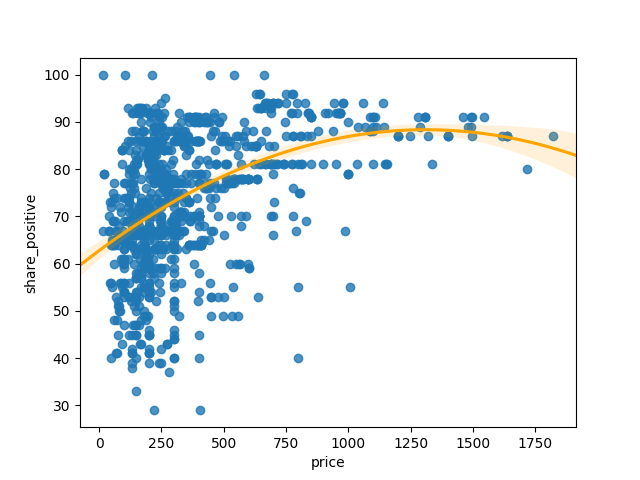

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [478]:
plt.figure()
sns.regplot(df.price, df.share_positive, line_kws={'color':'orange'}, order=2);

In [429]:
# It looks like the two variables are correlated, but up to a certain point.
# This means, there is an optimal price you should pay (but no more) to get the most out of your buck.

<IPython.core.display.Javascript object>


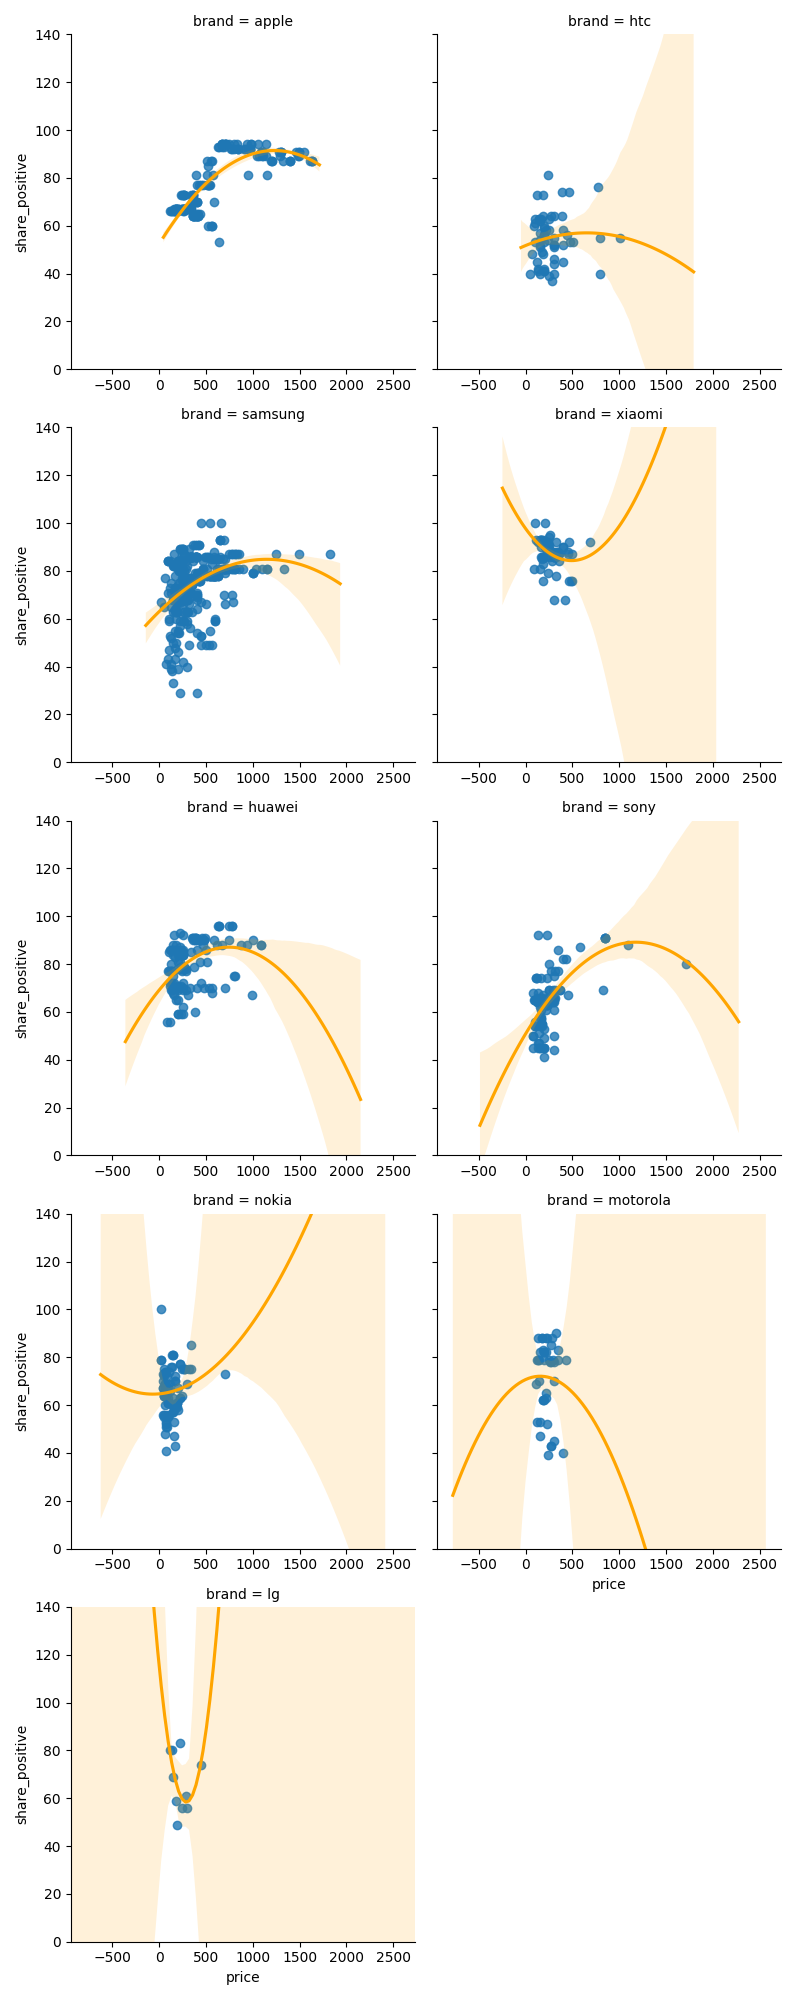

In [479]:
g = sns.FacetGrid(df, col="brand", col_wrap=2, height=4, ylim=(0, 140))
g.map(sns.regplot, 'price', 'share_positive', line_kws={'color':'orange'}, order=2)

for ax in g.axes.flat:
    _ = plt.setp(ax.get_xticklabels(), visible=True)

In [489]:
from scipy.stats import pearsonr

corrs = []

for brand in df.brand.unique():
    temp = df[df.brand == brand]
    corr, _ = pearsonr(temp.price, temp.share_positive)
    corrs.append([brand, corr])

cor_df = pd.DataFrame(corrs, columns=['brand', 'correlation']).sort_values(by='correlation', ascending=False)


In [491]:
def get_buckets(val):
    if abs(val) > 0.5:
        return 'STRONG'
    if abs(val) > 0.3:
        return 'MODERATE'
    else:
        return 'NO RELATIONSHIP'

In [493]:
cor_df['relationship'] = cor_df.correlation.apply(get_buckets)

In [494]:
cor_df

,brand,correlation,relationship
0,apple,0.760626,STRONG
5,sony,0.541938,STRONG
2,samsung,0.358781,MODERATE
4,huawei,0.348135,MODERATE
6,nokia,0.172826,NO RELATIONSHIP
1,htc,0.087866,NO RELATIONSHIP
7,motorola,-0.053021,NO RELATIONSHIP
8,lg,-0.148169,NO RELATIONSHIP
3,xiaomi,-0.340541,MODERATE


# Conclusion

The price-quality relationship varies greatly by brand. Even for the brands where the relationship is strong, there is a point at which it plateaus, meaning it's not worth spending more than X € on a phone of this brand.


# Limitations

1. The price falls over time. When scraping older phones, we get their discounted price. Ideally, the price upon release should be used.

2. Many models no longer were sold new, only used or refurbished price was available, which had to be disregarded.

3. It might be the case that low ratings for very expensive phones come from the fact that the expectations of the user were very high too, not because the phone itself was of bad quality. Hence, a 1-star review for a 200€ vs 1000€ phone does not indicate same quality for both.

4. Only a very small proportion of buyers leave reviews, often the most happy or unhappy ones, from a specific demographic. Ideally the data should be collected from a random sample of all buyers, not only the prolific reviewers.

5. It could be the case that the reviews tend to be good for newest models, but slowly deteriorate, as time passes, due to faults caused by planned obsolence. Hence newer models might have better reviews.